In [163]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Loading and Exploring the data

In [164]:
data=pd.read_csv("Fuel Consumption")

In [165]:
data.head(5)

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2 EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4.0,A4,X,9.2,6.7,8.1,35.0,186.0
1,2000,ACURA,1.6EL,COMPACT,1.6,4.0,M5,X,8.5,6.5,7.6,37.0,175.0
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6.0,AS5,Z,12.2,7.4,10.0,28.0,230.0
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6.0,A4,Z,13.4,9.2,11.5,25.0,264.0
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,A4,X,10.0,7.0,8.6,33.0,198.0


In [166]:
data.rename(columns={'FUEL CONSUMPTION':'FUEL CONSUMPTION (City)','Unnamed: 9':'FUEL CONSUMPTION (Highway)',
                          'Unnamed: 10':'FUEL CONSUMPTION (Combined)',
                          'Unnamed: 11':'FUEL CONSUMPTION (Combined) (miles per gallons)'}, 
                 inplace=True)
data.head(5)

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION (City),FUEL CONSUMPTION (Highway),FUEL CONSUMPTION (Combined),FUEL CONSUMPTION (Combined) (miles per gallons),CO2 EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4.0,A4,X,9.2,6.7,8.1,35.0,186.0
1,2000,ACURA,1.6EL,COMPACT,1.6,4.0,M5,X,8.5,6.5,7.6,37.0,175.0
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6.0,AS5,Z,12.2,7.4,10.0,28.0,230.0
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6.0,A4,Z,13.4,9.2,11.5,25.0,264.0
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,A4,X,10.0,7.0,8.6,33.0,198.0


In [167]:
data.dtypes.value_counts()

float64    7
object     6
dtype: int64

In [168]:
data.dtypes

MODEL                                               object
MAKE                                                object
MODEL.1                                             object
VEHICLE CLASS                                       object
ENGINE SIZE                                        float64
CYLINDERS                                          float64
TRANSMISSION                                        object
FUEL                                                object
FUEL CONSUMPTION (City)                            float64
FUEL CONSUMPTION (Highway)                         float64
FUEL CONSUMPTION (Combined)                        float64
FUEL CONSUMPTION (Combined) (miles per gallons)    float64
CO2 EMISSIONS                                      float64
dtype: object

# Summary Statistics of all the features

In [169]:
data.describe()

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION (City),FUEL CONSUMPTION (Highway),FUEL CONSUMPTION (Combined),FUEL CONSUMPTION (Combined) (miles per gallons),CO2 EMISSIONS
count,19733.000000,19733.000000,19733.000000,19733.000000,19733.000000,19733.000000,19733.000000
mean,3.379071,5.875589,12.786363,8.853043,11.017478,27.433487,248.682106
std,1.328065,1.798477,3.508261,2.282464,2.922852,7.401649,58.630272
min,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2.400000,4.000000,10.400000,7.300000,9.000000,22.000000,208.000000
50%,3.200000,6.000000,12.300000,8.400000,10.500000,27.000000,242.000000
75%,4.300000,8.000000,14.800000,10.200000,12.700000,31.000000,285.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,78.000000,570.000000


In [170]:
data.columns

Index(['MODEL', 'MAKE', 'MODEL.1', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION (City)',
       'FUEL CONSUMPTION (Highway)', 'FUEL CONSUMPTION (Combined)',
       'FUEL CONSUMPTION (Combined) (miles per gallons)', 'CO2 EMISSIONS '],
      dtype='object')

# Missing data

In [171]:
tot=data.isnull().sum().sort_values(ascending=False)
per=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
data_miss=pd.concat([tot,per],axis=1,keys=["Tot","Per"])
data_miss

,Tot,Per
CO2 EMISSIONS,1090,0.052346
FUEL CONSUMPTION (Combined) (miles per gallons),1090,0.052346
FUEL CONSUMPTION (Combined),1090,0.052346
FUEL CONSUMPTION (Highway),1090,0.052346
FUEL CONSUMPTION (City),1090,0.052346
FUEL,1090,0.052346
TRANSMISSION,1090,0.052346
CYLINDERS,1090,0.052346
ENGINE SIZE,1090,0.052346
VEHICLE CLASS,1090,0.052346


In [172]:
print(data.shape)
for i in range(data.shape[0]):
    if(data.loc[i].isnull().sum()>5):
        data.drop([i],inplace=True)
data.drop(columns=['MODEL', 'MAKE', 'MODEL.1','FUEL CONSUMPTION (Combined) (miles per gallons)'],inplace=True)
print(data.shape)

(20823, 13)
(19733, 9)


# Distribution of Features

To get an insight about how the data looks at the higher level a distribution graph is plot. Allowing to the see all the data at once.

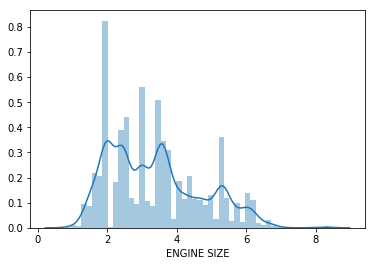

In [173]:
import seaborn as sns
sns.distplot(data[data.columns[1]])

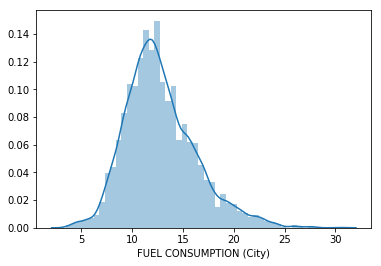

In [174]:
sns.distplot(data[data.columns[5]])

The above graph shows that the feautre containing fuel consumption values in cities deviates from normal distribution. The feature also has a positive skewness. 

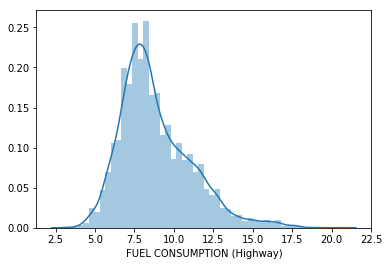

In [175]:
sns.distplot(data[data.columns[6]])

Similar to the fuel consumption in the city, fuel consumption in the highway also deviates from normal distribution. It has a positive skewness greater than that of the city.

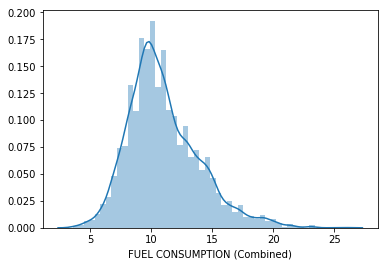

In [176]:
sns.distplot(data[data.columns[7]])

The distribution of combined fuel consumption is similar to that of the above two. Considering the fact that this feature represents the overall consumption of the fuel by the vechile.

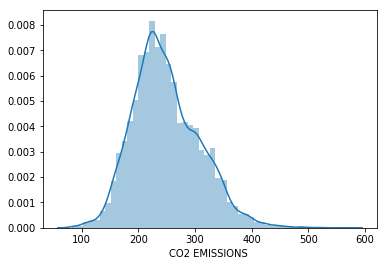

In [177]:
sns.distplot(data[data.columns[8]])

* Our target variable CO2 Emissions has a positive skewness and peakedness. 

**Conclusion** : The characteristics above show that we may want to perform some sort of transformation on the label to normalize it to improve the ability to predict it.

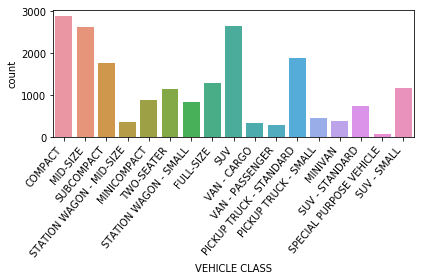

In [178]:
import numpy as np
variables=list(['VEHICLE CLASS','TRANSMISSION', 'FUEL'])
ax=sns.countplot(data[variables[0]],orient="h")
ax.set_xticklabels(ax.get_xticklabels(),rotation=50,ha="right")
plt.tight_layout()
plt.show()

* Compact, mid-size and SUV are three vechile classes that contribute to a large part of our dataset.
* Special purpose vechile, station wagon mid size, van passenger , van cargo contribute to a very less part of the dataset. Therefore such classes may not contribute much in the prediction process and therefore not proper inference about these vechile CO2 emissions can be made.

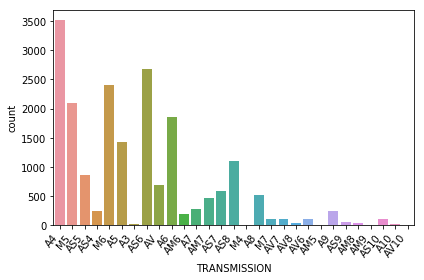

In [179]:
ax=sns.countplot(data[variables[1]],orient="h")
ax.set_xticklabels(ax.get_xticklabels(),rotation=50,ha="right")
plt.tight_layout()
plt.show()

A4 and AV dataset contibute to the large part of the dataset whereas AV0, AS6,A9 are very less in our dataset. Therefore they can not be infered totally about their CO2 emissions

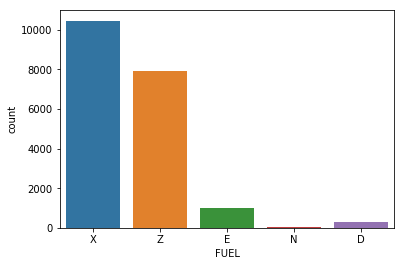

In [180]:
ax=sns.countplot(data[variables[2]],orient="h")

X type and Z type fuel are major contributors therefore the predcition that will be made will be more accurate for these type of fuel.

 # Correlations between variables

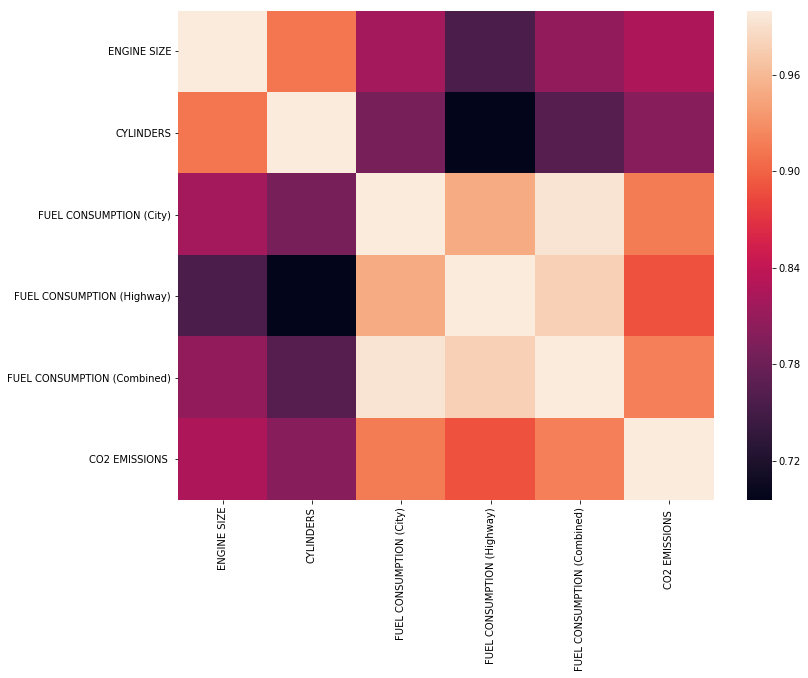

In [181]:
correlation_matrix = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(correlation_matrix)

* The analyzing the corelation matrix according to the scale present on the left it can be seen that the target variable has a greater correlation with the fuel consumption (city, highway, combined) features.
* This depicts that they would play a much important role in predicting the CO2 emissions of the vechile.
* Engine Size and Cylinders are less correlated features.
* All fuel consumption features shows a greater correlation to one another.
* Therefore while choosing the machine learning algorithm we need to be carefull with the assumptions of the algorithms, in order to use algorithms that take an assumption of independent features then we would need to uncorrelate them.

# Visualizing Outliners and relations between features and target variables

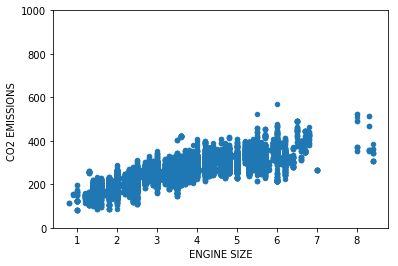

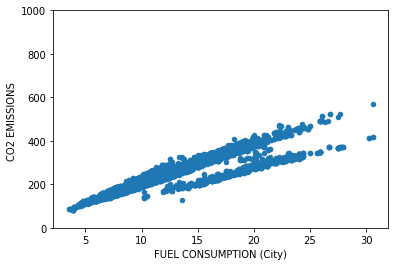

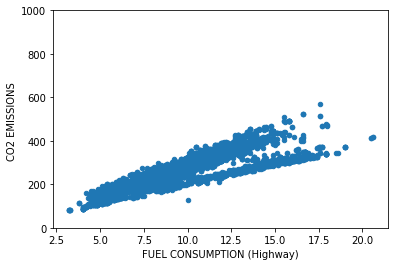

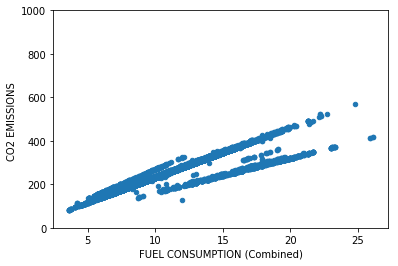

In [182]:
var = list(['ENGINE SIZE', 'FUEL CONSUMPTION (City)',
       'FUEL CONSUMPTION (Highway)', 'FUEL CONSUMPTION (Combined)'])
for i in range(0,4):
    outlier = pd.concat([data['CO2 EMISSIONS '], data[var[i]]], axis=1)
    outlier.plot.scatter(x=var[i], y='CO2 EMISSIONS ', ylim=(0,1000))

* All the four plots indicates that the features used here has little to no outliners present in them.
* The features shows a linear relationship with the target variable. Therefore such a linear relationship will make the predcition of the target much easier for the algorithm and achieve high accuracy.

**The correlation graph showed a relatively least correlation between the cylinders and the fuel consumption (highway). Let us visualize it**

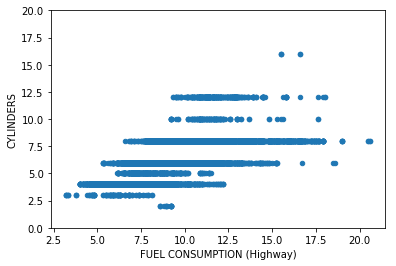

In [183]:
outlier = pd.concat([data['FUEL CONSUMPTION (Highway)'], data['CYLINDERS']], axis=1)
outlier.plot.scatter(x='FUEL CONSUMPTION (Highway)', y='CYLINDERS', ylim=(0,20))

The two features are correlated with one another but a particular value of cylinder gives range of values which depicts that relationship is not that direct between them.

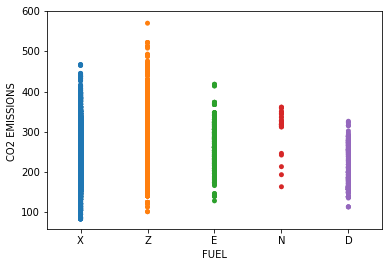

In [186]:
sns.stripplot(x=data[variables[2]],y=data['CO2 EMISSIONS '])

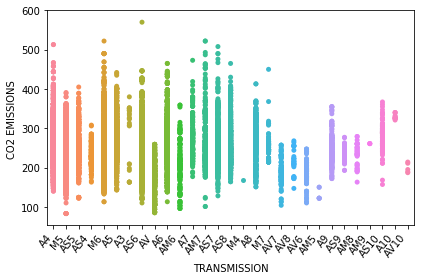

In [190]:
ax=sns.stripplot(x=data[variables[1]],y=data['CO2 EMISSIONS '])
ax.set_xticklabels(ax.get_xticklabels(),rotation=50,ha="right")
plt.tight_layout()
plt.show()

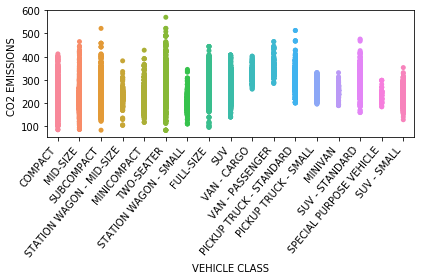

In [189]:
ax=sns.stripplot(x=data[variables[0]],y=data['CO2 EMISSIONS '])
ax.set_xticklabels(ax.get_xticklabels(),rotation=50,ha="right")
plt.tight_layout()
plt.show()

The above three plots shows the conribution of each class of categorical data in the CO2 emissions. The analysis of the above plots makes it clear that most of the classes have fair number of points under their umbrella but have have far less points to make provide a significant learning about them.